
YEAR = Year of the Flight Trip

MONTH = Month of the Flight Trip

DAY = Day of the Flight Trip

DAY_OF_WEEK = Day of week of the Flight Trip

AIRLINE =  Airline Identifier

FLIGHT_NUMBER =  Flight Identifier

TAIL_NUMBER = Aircraft Identifier

ORIGIN_AIRPORT =  Starting Airport

DESTINATION_AIRPORT =  	Destination Airport

SCHEDULED_DEPARTURE	= Planned Departure Time

DEPARTURE_TIME= WHEEL_OFF - TAXI_OUT


DEPARTURE_DELAY= Total Delay on Departure

TAXI_OUT = The time duration elapsed between departure from the origin airport gate and wheels off

WHEELS_OFF= The time point that the aircraft's wheels leave the ground

SCHEDULED_TIME=	 Planned time amount needed for the flight trip

ELAPSED_TIME= AIR_TIME+TAXI_IN+TAXI_OUT

AIR_TIME= The time duration between wheels_off and wheels_on time

DISTANCE= Distance between two airports

WHEELS_ON= The time point that the aircraft's wheels touch on the ground

TAXI_IN= The time duration elapsed between wheels-on and gate arrival at the destination airport

SCHEDULED_ARRIVAL= Planned arrival time

ARRIVAL_TIME= WHEELS_ON+TAXI_IN

ARRIVAL_DELAY= ARRIVAL_TIME-SCHEDULED_ARRIVAL

DIVERTED= Aircraft landed on airport that out of schedule

CANCELLED= Flight Cancelled (1 = cancelled)

CANCELLATION_REASON= Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security

AIR_SYSTEM_DELAY= Delay caused by air system

SECURITY_DELAY= Delay caused by security

AIRLINE_DELAY= Delay caused by the airline

LATE_AIRCRAFT_DELAY= Delay caused by aircraft

WEATHER_DELAY	= Delay caused by weather




In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
flight_data = pd.read_csv(r'F:\TechnocolabProjects\flights.csv')

C:\Users\lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
airlines = pd.read_csv(r'F:\TechnocolabProjects\airlines.csv')
airports = pd.read_csv(r'F:\TechnocolabProjects\airports.csv')

In [4]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [5]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [6]:
flight_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print("Rows : ", flight_data.shape[0])
print("Columns : ", flight_data.shape[1])

Rows :  5819079
Columns :  31


In [8]:
#Let's create a function to show the unique_values,Null_values and data_type

def f_summary(df):
    df_null = df.isnull().sum()
    df_unique = df.nunique()
    df_dtype = df.dtypes
    
    df_null = df_null.to_frame().reset_index()
    df_unique = df_unique.to_frame().reset_index()
    df_dtype = df_dtype.to_frame().reset_index()
    
    df_null = df_null.rename(columns = {0 : 'Null_Values'})
    df_unique = df_unique.rename(columns = {0 : 'Unique_Values'})
    df_dtype = df_dtype.rename(columns = {0 : 'Dtype'})
    
    output = pd.merge(pd.merge(df_unique,df_null,on = 'index'), df_dtype, on = 'index')
    return output

In [9]:
f_summary(flight_data)

,index,Unique_Values,Null_Values,Dtype
0,YEAR,1,0,int64
1,MONTH,12,0,int64
2,DAY,31,0,int64
3,DAY_OF_WEEK,7,0,int64
4,AIRLINE,14,0,object
5,FLIGHT_NUMBER,6952,0,int64
6,TAIL_NUMBER,4897,14721,object
7,ORIGIN_AIRPORT,930,0,object
8,DESTINATION_AIRPORT,930,0,object
9,SCHEDULED_DEPARTURE,1321,0,int64


In [10]:
#removing unnecessary column
flight_data.drop(['YEAR','TAXI_OUT','WHEELS_OFF','WHEELS_ON','TAXI_IN','ELAPSED_TIME'], axis = 1,inplace = True)

In [11]:
flight_data.shape

(5819079, 25)

In [12]:
#dividing the flight dataset on the basis of cancelled and not cancelled

cancelled_flights = flight_data[flight_data['CANCELLED'] ==1]

In [13]:
cancelled_flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_TIME', 'AIR_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [14]:
flight_num_col = flight_data.select_dtypes(include = ['float64','int64']).columns.tolist()
flight_cat_col = flight_data.select_dtypes(include = ['object']).columns.tolist()

In [15]:
set(flight_data['CANCELLATION_REASON'])

{'A', 'B', 'C', 'D', nan}

In [16]:
cancelled_flights = flight_data['CANCELLATION_REASON'].value_counts()

cancelled_flights

B    48851
A    25262
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CANCELLATION_REASON', ylabel='count'>

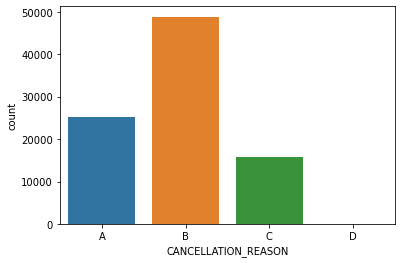

In [17]:
sns.countplot(flight_data['CANCELLATION_REASON'])

In [18]:
#Filling all NAN with 0, in cancellation reaaon
flight_data['CANCELLATION_REASON'] = flight_data['CANCELLATION_REASON'].fillna(0)

In [19]:
flight_data['AIRLINE'].value_counts()

WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836
HA      76272
VX      61903
Name: AIRLINE, dtype: int64

In [20]:
# converting 
flight_data.loc[flight_data['AIRLINE'] == 'WN', 'AIRLINE'] = 'Southwest Airlines Co.'
flight_data.loc[flight_data['AIRLINE'] == 'DL', 'AIRLINE'] = 'Delta Air Lines Inc.'
flight_data.loc[flight_data['AIRLINE'] == 'AA', 'AIRLINE'] = 'American Airlines Inc.'
flight_data.loc[flight_data['AIRLINE'] == 'OO', 'AIRLINE'] = 'Skywest Airlines Inc.'
flight_data.loc[flight_data['AIRLINE'] == 'EV', 'AIRLINE'] = 'Atlantic Southeast Airlines'
flight_data.loc[flight_data['AIRLINE'] == 'UA', 'AIRLINE'] = 'United Air Lines Inc.'
flight_data.loc[flight_data['AIRLINE'] == 'MQ', 'AIRLINE'] = 'American Eagle Airlines Inc.'
flight_data.loc[flight_data['AIRLINE'] == 'B6', 'AIRLINE'] = 'JetBlue Airways'
flight_data.loc[flight_data['AIRLINE'] == 'US', 'AIRLINE'] = 'US Airways Inc.'
flight_data.loc[flight_data['AIRLINE'] == 'AS', 'AIRLINE'] = 'Alaska Airlines Inc.'
flight_data.loc[flight_data['AIRLINE'] == 'NK', 'AIRLINE'] = 'Spirit Air Lines'
flight_data.loc[flight_data['AIRLINE'] == 'F9', 'AIRLINE'] = 'Frontier Airlines Inc.'
flight_data.loc[flight_data['AIRLINE'] == 'HA', 'AIRLINE'] = 'Hawaiian Airlines Inc.'
flight_data.loc[flight_data['AIRLINE'] == 'VX', 'AIRLINE'] = 'Virgin America'


In [21]:
flight_data['AIRLINE'].value_counts()

Southwest Airlines Co.          1261855
Delta Air Lines Inc.             875881
American Airlines Inc.           725984
Skywest Airlines Inc.            588353
Atlantic Southeast Airlines      571977
United Air Lines Inc.            515723
American Eagle Airlines Inc.     294632
JetBlue Airways                  267048
US Airways Inc.                  198715
Alaska Airlines Inc.             172521
Spirit Air Lines                 117379
Frontier Airlines Inc.            90836
Hawaiian Airlines Inc.            76272
Virgin America                    61903
Name: AIRLINE, dtype: int64

In [22]:
f_summary(flight_data)

,index,Unique_Values,Null_Values,Dtype
0,MONTH,12,0,int64
1,DAY,31,0,int64
2,DAY_OF_WEEK,7,0,int64
3,AIRLINE,14,0,object
4,FLIGHT_NUMBER,6952,0,int64
5,TAIL_NUMBER,4897,14721,object
6,ORIGIN_AIRPORT,930,0,object
7,DESTINATION_AIRPORT,930,0,object
8,SCHEDULED_DEPARTURE,1321,0,int64
9,DEPARTURE_TIME,1440,86153,float64


<AxesSubplot:xlabel='ARRIVAL_DELAY', ylabel='AIRLINE'>

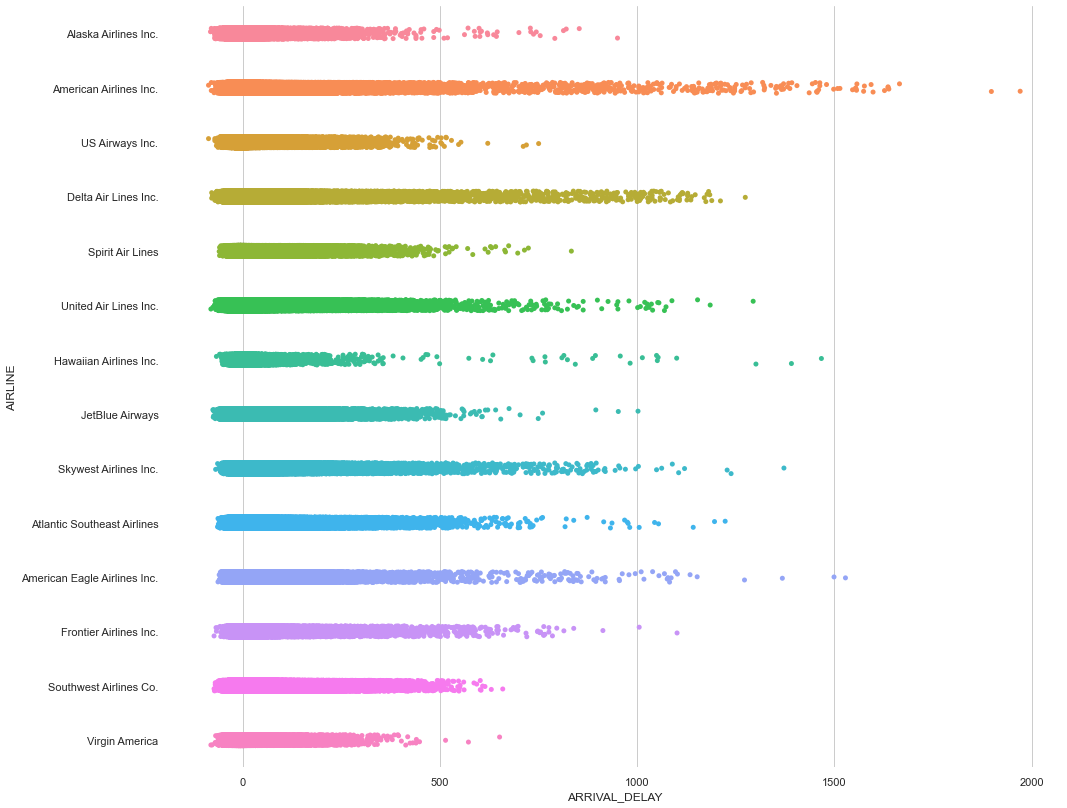

In [23]:
sns.set(style="whitegrid")

# initialize the figure
fig_dim = (16,14)
f, ax = plt.subplots(figsize=fig_dim)
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data=flight_data, dodge=True, jitter=True
            )

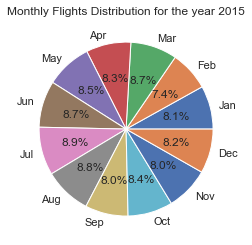

In [24]:
# plot the month distribution on a pie chart
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.pie(x=flight_data.groupby('MONTH').count()['FLIGHT_NUMBER'], autopct='%1.1f%%', labels=labels)
plt.title("Monthly Flights Distribution for the year 2015")
plt.show()

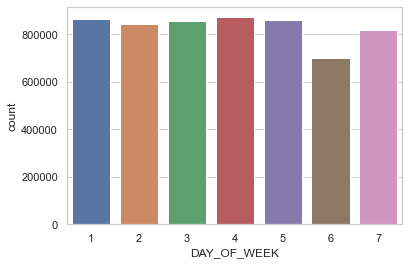

In [25]:
# plot the distribution of flights across DAY_OF_WEEK
sns.countplot(data=flight_data, x='DAY_OF_WEEK')
plt.show()

In [26]:
flight_n_data = flight_data

In [27]:
flight_n_data['AIRLINE_DELAY'].fillna(0,inplace=True)
flight_n_data['AIR_SYSTEM_DELAY'].fillna(0,inplace=True)
flight_n_data['SECURITY_DELAY'].fillna(0,inplace=True)
flight_n_data['LATE_AIRCRAFT_DELAY'].fillna(0,inplace=True)
flight_n_data['WEATHER_DELAY'].fillna(0,inplace=True)
flight_n_data.isnull().sum()

MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER             14721
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
SCHEDULED_TIME              6
AIR_TIME               105071
DISTANCE                    0
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON         0
AIR_SYSTEM_DELAY            0
SECURITY_DELAY              0
AIRLINE_DELAY               0
LATE_AIRCRAFT_DELAY         0
WEATHER_DELAY               0
dtype: int64

In [28]:
flight_n_data.dropna(subset=['DEPARTURE_TIME','DEPARTURE_DELAY'],how='all',inplace=True)
flight_n_data.dropna(subset=['ARRIVAL_TIME'],how='all',inplace=True)
flight_n_data.dropna(subset=['ARRIVAL_DELAY'],how='all',inplace=True)

In [29]:
flight_n_data.drop(['TAIL_NUMBER'],axis = 1, inplace = True)
flight_n_data.drop(['AIR_TIME'],axis = 1, inplace = True)
flight_n_data.drop(['DIVERTED','CANCELLED'],axis = 1, inplace = True)

In [30]:
flight_n_data.isnull().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
SCHEDULED_TIME         0
DISTANCE               0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

C:\Users\lenovo\AppData\Local\Temp/ipykernel_9532/1440796366.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


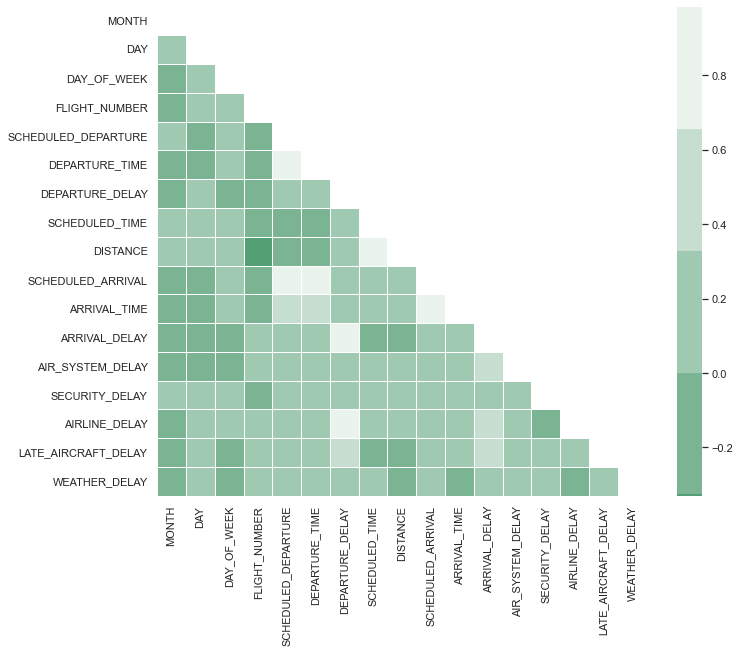

In [31]:
# Correlation
correlation = flight_n_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)  

mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.light_palette("seagreen", reverse=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, cmap=cmap,  center=0, square=True, linewidths=.5, mask=mask);

<AxesSubplot:xlabel='AIRLINE'>

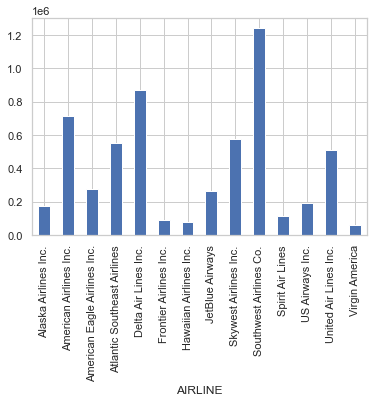

In [32]:
flight_n_data.groupby('AIRLINE').count()['MONTH'].plot.bar()


<AxesSubplot:ylabel='MONTH'>

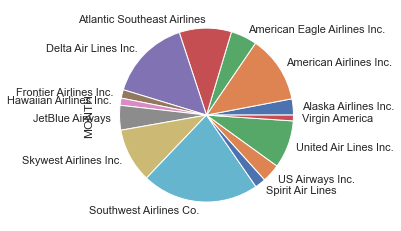

In [33]:
flight_n_data.groupby('AIRLINE').count()['MONTH'].plot.pie()


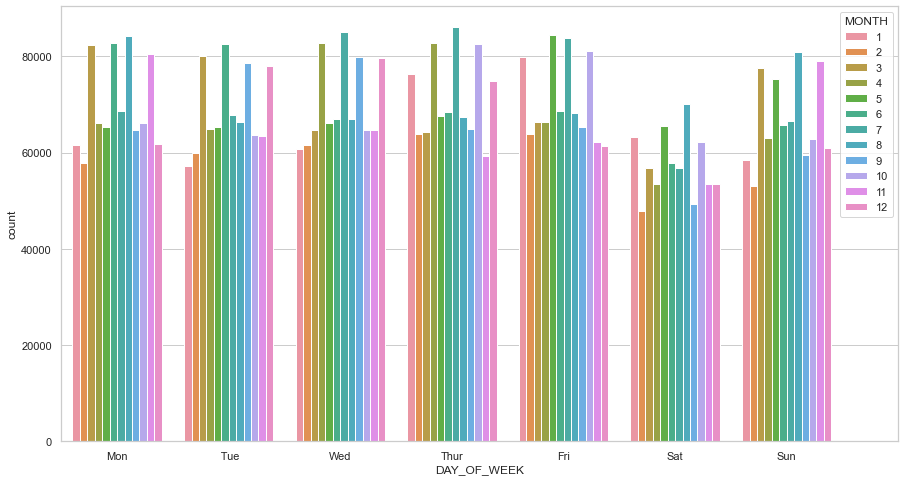

In [34]:
# plot the distribution of flights across DAY_OF_WEEK for each Month
day_labels = ['Mon',' Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun', '']
plt.figure(figsize=(15,8))
sns.countplot(data=flight_data, x='DAY_OF_WEEK', hue='MONTH')
plt.xticks(labels=day_labels, ticks=np.arange(0,8,1))
plt.show()

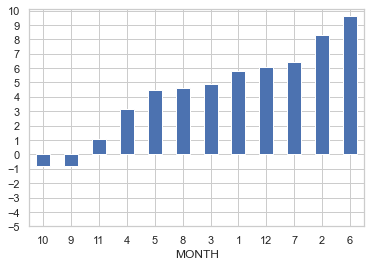

In [35]:
# Plot ARRIVAL_DELAY across months
flight_n_data.groupby('MONTH').mean()['ARRIVAL_DELAY'].sort_values().plot(kind='bar')
plt.yticks(np.arange(-5,11,1))
plt.xticks(rotation=0)
plt.show()

Months of September and October have an average of arrival time in negative. That means flights on an average used to arrive before the scheduled time in these 2 months

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

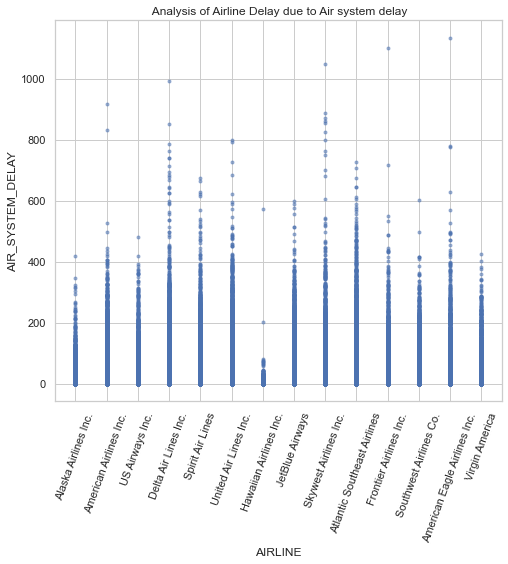

In [36]:
# Airline Delay due to Air system delay

plt.figure(figsize=(8,7))
plt.xlabel("AIRLINE")
plt.ylabel("AIR_SYSTEM_DELAY")
plt.title(" Analysis of Airline Delay due to Air system delay")
plt.plot(flight_n_data.AIRLINE, flight_n_data["AIR_SYSTEM_DELAY"],'.', alpha = 0.5)
plt.xticks(rotation = 70)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

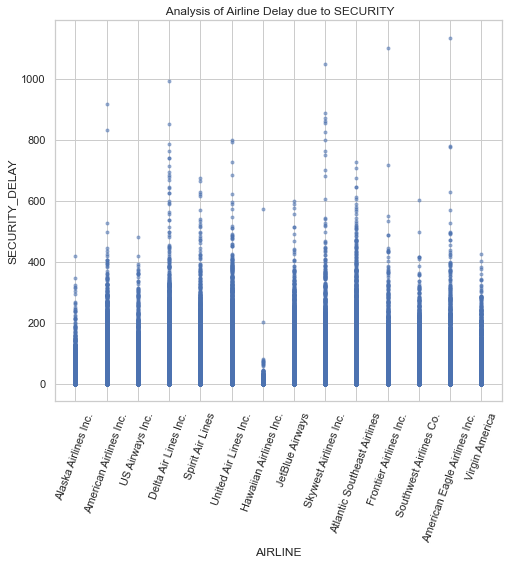

In [37]:
# Airline Delay due to SECURITY

plt.figure(figsize=(8,7))
plt.xlabel("AIRLINE")
plt.ylabel("SECURITY_DELAY")
plt.title(" Analysis of Airline Delay due to SECURITY")
plt.plot(flight_n_data.AIRLINE, flight_n_data["AIR_SYSTEM_DELAY"],'.', alpha = 0.5)
plt.xticks(rotation = 70)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

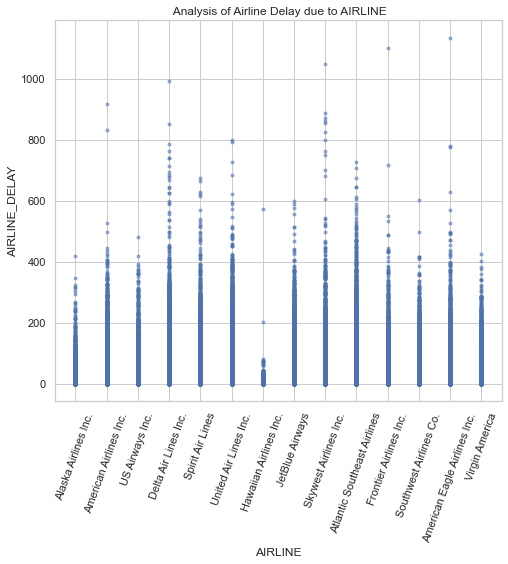

In [38]:
# Airline Delay due to AIRLINE

plt.figure(figsize=(8,7))
plt.xlabel("AIRLINE")
plt.ylabel("AIRLINE_DELAY")
plt.title(" Analysis of Airline Delay due to AIRLINE")
plt.plot(flight_n_data.AIRLINE, flight_n_data["AIR_SYSTEM_DELAY"],'.', alpha = 0.5)
plt.xticks(rotation = 70)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

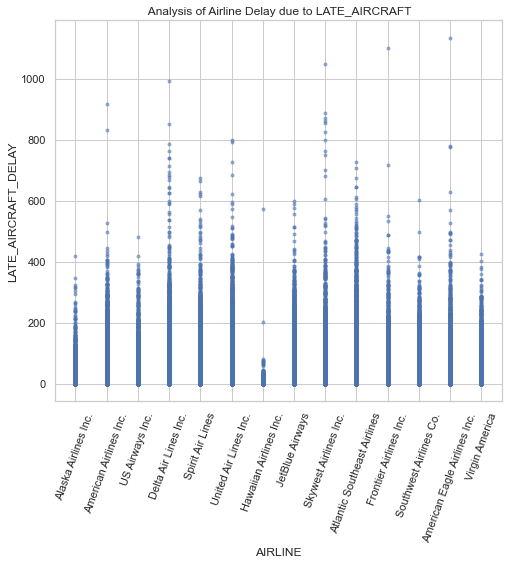

In [39]:
# Airline Delay due to LATE_AIRCRAFT

plt.figure(figsize=(8,7))
plt.xlabel("AIRLINE")
plt.ylabel("LATE_AIRCRAFT_DELAY")
plt.title(" Analysis of Airline Delay due to LATE_AIRCRAFT")
plt.plot(flight_n_data.AIRLINE, flight_n_data["AIR_SYSTEM_DELAY"],'.', alpha = 0.5)
plt.xticks(rotation = 70)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

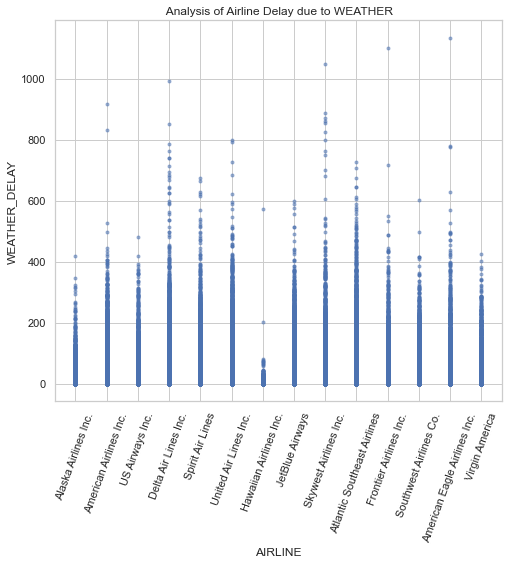

In [40]:
# Airline Delay due to WEATHER

plt.figure(figsize=(8,7))
plt.xlabel("AIRLINE")
plt.ylabel("WEATHER_DELAY")
plt.title(" Analysis of Airline Delay due to WEATHER")
plt.plot(flight_n_data.AIRLINE, flight_n_data["AIR_SYSTEM_DELAY"],'.', alpha = 0.5)
plt.xticks(rotation = 70)

In [41]:
# 0 = On time/ before time/ not more than 15 mins of delay
# 1 = more than 15 mins and less than 30 mins of delay
# 2 = more than 30 mins and less than 1 hr of delay
# 3 = more than an hour of delay

#year column is unneccesary since the data is bounded to 2015 but day and month are important
delay =[]
for row in flight_n_data['ARRIVAL_DELAY']:
    if row > 60:
        delay.append(3)
    elif row > 30:
        delay.append(2)
    elif row > 15:
        delay.append(1)
    else:
        delay.append(0)  
flight_n_data['delay'] = delay


In [42]:
flight_n_data.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'DISTANCE',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'delay'],
      dtype='object')

In [43]:
flights_data_forPred=flight_n_data.drop(['FLIGHT_NUMBER','AIRLINE','DISTANCE','SCHEDULED_TIME','DEPARTURE_TIME','DAY_OF_WEEK','CANCELLATION_REASON','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)

In [44]:
flights_data_forPred.shape

(5714008, 11)

In [45]:
flights_data_forPred.isnull().sum()


MONTH                  0
DAY                    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
delay                  0
dtype: int64

## Applying Naive Bayes Classifier

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
# Prepare data into features=>X and target=>y
X = flights_data_forPred.drop('delay',axis = 1)
y = flights_data_forPred['delay']

In [48]:
# Split data into Training and Testing
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


# Make model of GaussianNB and fit it to training data

model = GaussianNB()
model.fit(X, y)


# Predict over test_data. 
predicted= model.predict(X_test)
print(predicted)

# Print the accuracy and classification_report.

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
print(confusion_matrix(y_test, predicted))  
print(classification_report(y_test, predicted))
print(accuracy_score(y_test, predicted))


[0 0 0 ... 1 0 1]
[[929944   8229    123     20]
 [     0  73825   3900    320]
 [     0  19178  41798   1685]
 [     0     12  19242  44526]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    938316
           1       0.73      0.95      0.82     78045
           2       0.64      0.67      0.65     62661
           3       0.96      0.70      0.81     63780

    accuracy                           0.95   1142802
   macro avg       0.83      0.83      0.82   1142802
weighted avg       0.96      0.95      0.95   1142802

0.95387739958453


In [49]:
from sklearn.naive_bayes import BernoulliNB

X = flights_data_forPred.drop('delay',axis = 1)
y = flights_data_forPred['delay']

# Split data into Training and Testing
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Check on Bernoulli Classifier
modelB = BernoulliNB()

# Train the model
modelB.fit(X_train, y_train) 

# Predict Output 
predB = modelB.predict(X_test)
print(predB[ : 5 ])

[0 0 0 0 0]


In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  

print(confusion_matrix(y_test, predB))  

print(classification_report(y_test, predB)) 

print(accuracy_score(y_test, predB))

[[932451   2867      4   2994]
 [ 14766  27863      2  35414]
 [  4512  21295      3  36851]
 [   855  20445      3  42477]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    938316
           1       0.38      0.36      0.37     78045
           2       0.25      0.00      0.00     62661
           3       0.36      0.67      0.47     63780

    accuracy                           0.88   1142802
   macro avg       0.49      0.50      0.46   1142802
weighted avg       0.86      0.88      0.86   1142802

0.8774870887520323


Here The accuracy of GaussianNB is appx 95.3% 

GaussianNB is providing much accuracy as compare to BernoulliNB, here we can not use MultinomialNB because we have some negative values in our database.

### Now Applying Decision Tree Regressor

In [51]:
flights_data_forPred.head()

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,delay
0,1,1,5,-11.0,430,0.0,0.0,0.0,0.0,0.0,0
1,1,1,10,-8.0,750,0.0,0.0,0.0,0.0,0.0,0
2,1,1,20,-2.0,806,0.0,0.0,0.0,0.0,0.0,0
3,1,1,20,-5.0,805,0.0,0.0,0.0,0.0,0.0,0
4,1,1,25,-1.0,320,0.0,0.0,0.0,0.0,0.0,0


In [52]:
flights_data_forREGMODEL=flight_n_data.drop(['FLIGHT_NUMBER','AIRLINE','DISTANCE','DAY_OF_WEEK','CANCELLATION_REASON','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'],axis=1)

In [53]:
X = flights_data_forREGMODEL.drop('ARRIVAL_DELAY',axis = 1)
y = flights_data_forREGMODEL['ARRIVAL_DELAY']

In [54]:
y.head()

0   -22.0
1    -9.0
2     5.0
3    -9.0
4   -21.0
Name: ARRIVAL_DELAY, dtype: float64

In [55]:
# dividing data into training and testing set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  

In [ ]:
# Training and Making Predictions

from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)

In [57]:
# To make predictions on the test set, 
y_pred = regressor.predict(X_test)

In [58]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df  

,Actual,Predicted
2167050,-4.0,-5.0
1395129,-2.0,-2.0
2771766,-4.0,-7.0
5181045,-13.0,-13.0
947404,-11.0,-12.0
...,...,...
4021771,-13.0,-12.0
782369,40.0,40.0
3901285,-15.0,-15.0
5776882,-11.0,-11.0


In [59]:
# Evaluating the Algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 1.4747349059592125
Mean Squared Error: 10.848732034654006
Root Mean Squared Error: 3.2937413430101046


In [60]:
flights_data_forREGMODEL['ARRIVAL_DELAY'].mean()

4.407057357987598

## Trying with test_size = 10%

In [61]:
# dividing data into training and testing set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)  

# Training and Making Predictions
# Note : we will using DecisionTreeRegressor class, not DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)

# To make predictions on the test set, 
y_pred = regressor.predict(X_test)
 

In [62]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df  

,Actual,Predicted
2167050,-4.0,-4.0
1395129,-2.0,-2.0
2771766,-4.0,-7.0
5181045,-13.0,-14.0
947404,-11.0,-12.0
...,...,...
5072498,-18.0,-18.0
1092815,-8.0,-8.0
3331839,3.0,6.0
851119,22.0,22.0


In [63]:
# Evaluating the Algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 1.3047509542335418
Mean Squared Error: 9.854564482736292
Root Mean Squared Error: 3.1391980636360444
